<b>Ferrari Data Book<b>

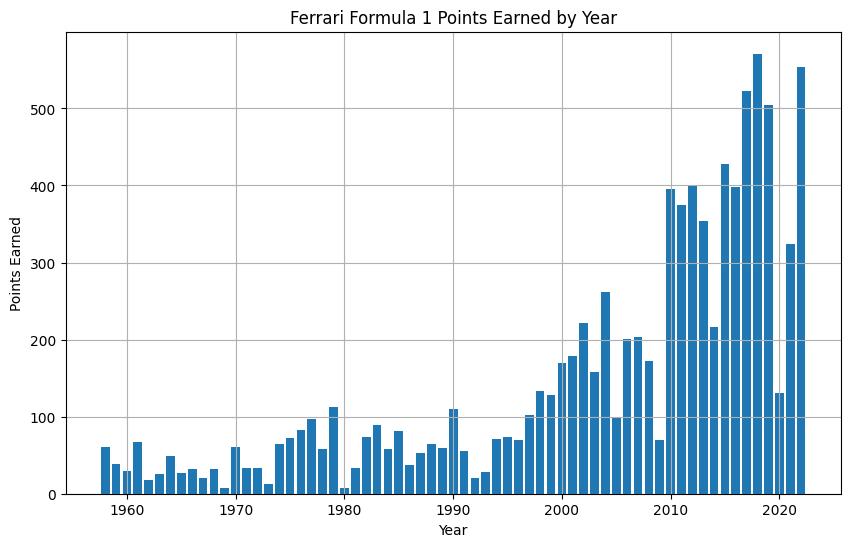

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV files / add seaborn later
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

# Ferrari's constructorId (ferrari_constructor_id)
ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]


merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])
merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

# Visualizations
plt.figure(figsize=(10, 6))
plt.bar(ferrari_points_by_year['year'], ferrari_points_by_year['points_x'])
plt.xlabel('Year')
plt.ylabel('Points Earned')
plt.title('Ferrari Formula 1 Points Earned by Year')
plt.grid(True)
plt.show()


In [13]:
# ferrari_constructor_id.head()
ferrari_data.head()
# ferrari_points_by_year.dtype() not needed / come back

,constructorResultsId,raceId,constructorId,points_x,status,constructorStandingsId,points_y,position,positionText,wins,year
5,6,18,6,1.0,\N,6,1.0,6,6,0,2008
6,12,19,6,10.0,\N,12,11.0,3,3,1,2008
17,23,20,6,18.0,\N,23,29.0,2,2,2,2008
28,34,21,6,18.0,\N,34,47.0,1,1,3,2008
39,45,22,6,16.0,\N,45,63.0,1,1,4,2008


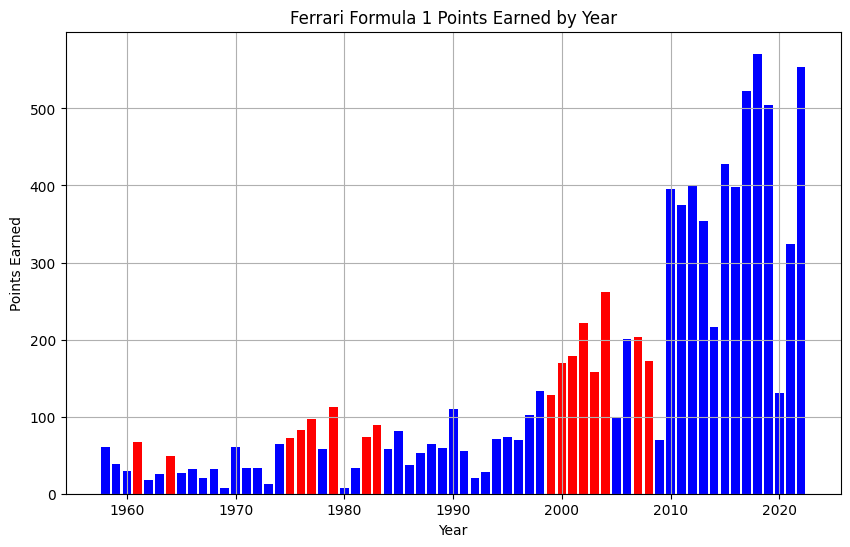

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Ferrari data
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')


ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]


merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])

# recheck / change merge take from old sheet.
merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

# Ferrari only filter
ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

# make red?
highlight_years = [1961, 1964, 1975, 1976, 1977, 1979, 1982, 1983, 1999, 2000, 2001, 2002, 2003, 2004, 2007, 2008]

plt.figure(figsize=(10, 6))

#for i in enumerate() pointsbyyear
for i, year in enumerate(ferrari_points_by_year['year']):
    points = ferrari_points_by_year.loc[i, 'points_x']
    bar_color = 'red' if year in highlight_years and points > 0 else 'blue'
    plt.bar(year, points, color=bar_color)

plt.xlabel('Year')
plt.ylabel('Points Earned')
plt.title('Ferrari Formula 1 Points Earned by Year')
plt.grid(True)
plt.show()


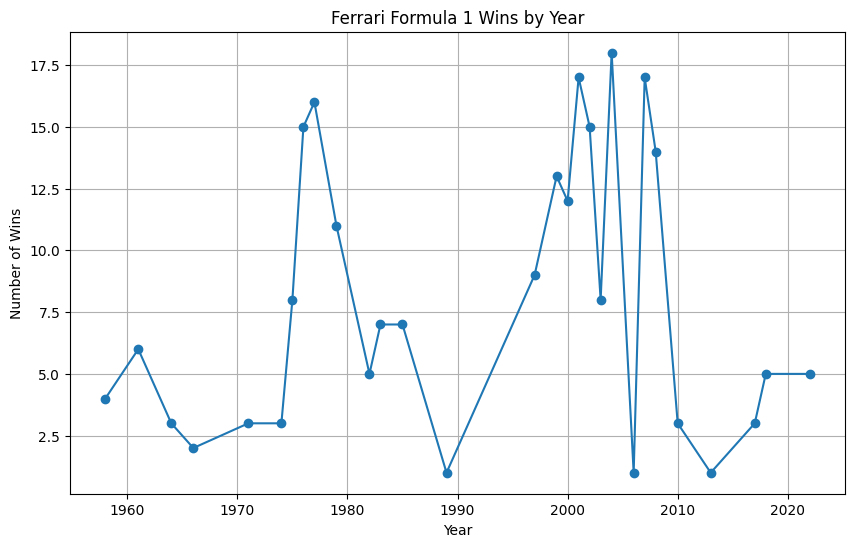

In [6]:

ferrari_wins_by_year = ferrari_data[ferrari_data['positionText'] == '1']['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(ferrari_wins_by_year.index, ferrari_wins_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Ferrari Formula 1 Wins by Year')
plt.grid(True)
plt.show()


wow what happened in the mid 90's till the late 2000's?

<!-- ![What Happened in the mid 90s?](msc.jpg){width=50 height=50} -->

<img src="msc.jpg" alt="GOAT" style="width:800px;"/>

Oh yeah... Michael "7 Time World Champion" Schumacher

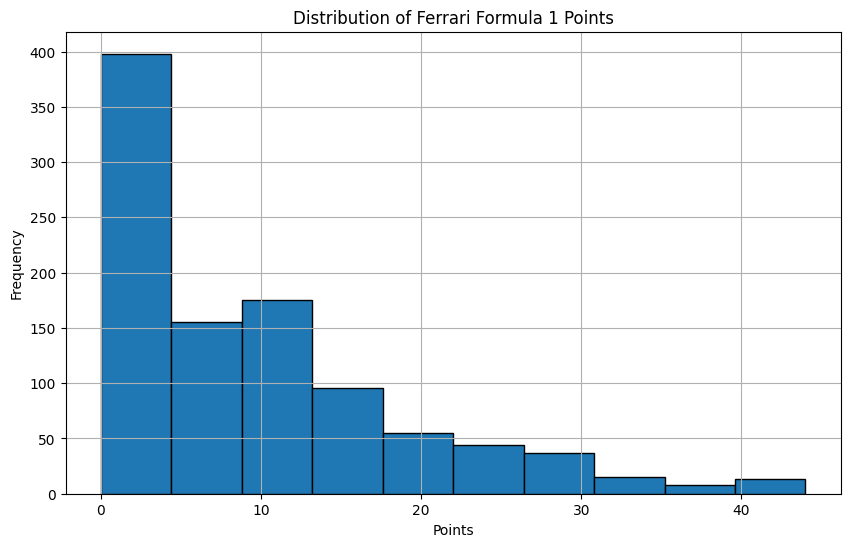

In [7]:

plt.figure(figsize=(10, 6))
plt.hist(ferrari_data['points_x'], bins=10, edgecolor='black')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Ferrari Formula 1 Points')
plt.grid(True)
plt.show()


Mean Squared Error: 18723.715173974695
Year: 2023, Predicted Points: 305.65191713747663
Year: 2024, Predicted Points: 310.99859133710015
Year: 2025, Predicted Points: 316.3452655367237
Year: 2026, Predicted Points: 321.6919397363472
Year: 2027, Predicted Points: 327.0386139359707
Year: 2028, Predicted Points: 332.38528813559424
Year: 2029, Predicted Points: 337.73196233521776
Year: 2030, Predicted Points: 343.0786365348413
Year: 2031, Predicted Points: 348.4253107344648
Year: 2032, Predicted Points: 353.7719849340883
Year: 2033, Predicted Points: 359.11865913371
Year: 2034, Predicted Points: 364.46533333333355
Year: 2035, Predicted Points: 369.81200753295707
Year: 2036, Predicted Points: 375.1586817325806
Year: 2037, Predicted Points: 380.5053559322041
Year: 2038, Predicted Points: 385.85203013182763
Year: 2039, Predicted Points: 391.19870433145115
Year: 2040, Predicted Points: 396.5453785310747
Year: 2041, Predicted Points: 401.8920527306982
Year: 2042, Predicted Points: 407.238726930

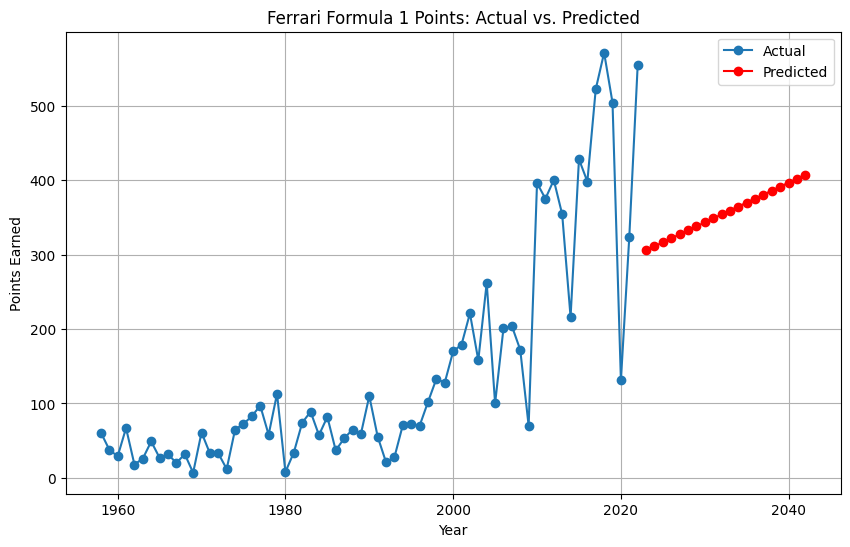

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# data
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')


ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]

merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])

merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

# Filter my merge Ferrari only
ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

X = ferrari_points_by_year['year'].values.reshape(-1, 1)
y = ferrari_points_by_year['points_x'].values

# Split into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# MSE Stuff
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

future_years = range(2023, 2043)
future_years = [[year] for year in future_years]
future_predictions = model.predict(future_years)

for year, prediction in zip(future_years, future_predictions):
    print(f"Year: {year[0]}, Predicted Points: {prediction}")

    #add plots after


plt.figure(figsize=(10, 6))
plt.plot(ferrari_points_by_year['year'], ferrari_points_by_year['points_x'], marker='o', label='Actual')
plt.plot(future_years, future_predictions, marker='o', label='Predicted', color='red')
plt.xlabel('Year')
plt.ylabel('Points Earned')
plt.title('Ferrari Formula 1 Points: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

#random forest regressor - check
#what am i trying to find with the data / questions


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]

merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])

merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

X = ferrari_points_by_year['year'].values.reshape(-1, 1)
y = ferrari_points_by_year['points_x'].values

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

future_years = np.arange(2023, 2033).reshape(-1, 1)
future_predictions = model.predict(future_years)

for year, prediction in zip(range(2023, 2033), future_predictions):
    print(f"Year: {year}, Predicted Points: {prediction}")
    



Mean Squared Error: 11602.273946153844
Year: 2023, Predicted Points: 294.165
Year: 2024, Predicted Points: 294.165
Year: 2025, Predicted Points: 294.165
Year: 2026, Predicted Points: 294.165
Year: 2027, Predicted Points: 294.165
Year: 2028, Predicted Points: 294.165
Year: 2029, Predicted Points: 294.165
Year: 2030, Predicted Points: 294.165
Year: 2031, Predicted Points: 294.165
Year: 2032, Predicted Points: 294.165


MSE Score for Test 1: 10008.960980769232
MSE Score for Test 2: 12350.831661538461
MSE Score for Test 3: 12355.848592307693
MSE Score for Test 4: 10984.42434423077
MSE Score for Test 5: 12258.24393653846
MSE Score for Test 6: 12635.252913461542
MSE Score for Test 7: 11947.382648076922
MSE Score for Test 8: 12687.94793269231
MSE Score for Test 9: 13362.452842307694
MSE Score for Test 10: 12378.872076923077


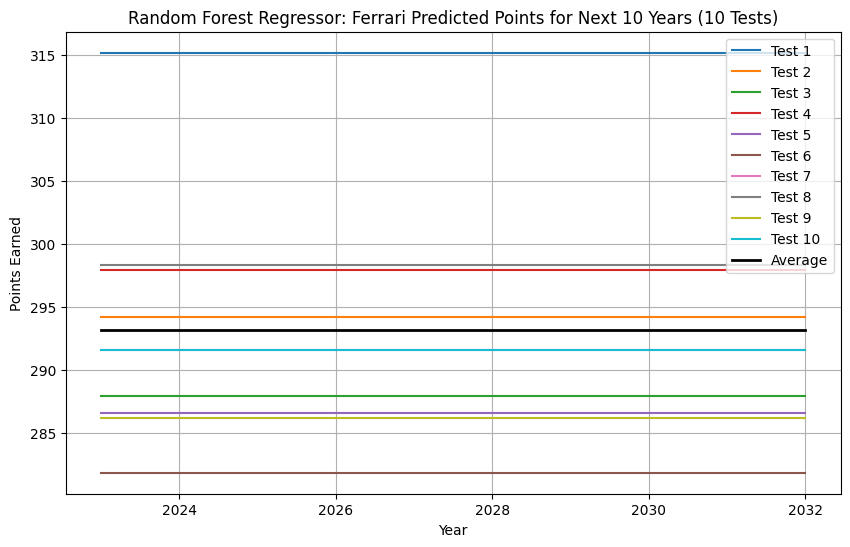

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')

ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]

merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])

merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

X = ferrari_points_by_year['year'].values.reshape(-1, 1)
y = ferrari_points_by_year['points_x'].values


mse_scores = []
future_predictions_all = []

# Random Forest Regressor x10 times
for _ in range(10):
    model = RandomForestRegressor()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    future_years = np.arange(2023, 2033).reshape(-1, 1)
    future_predictions = model.predict(future_years)
    future_predictions_all.append(future_predictions)

for i, mse in enumerate(mse_scores):
    print(f"MSE Score for Test {i+1}: {mse}")


average_predictions = np.mean(future_predictions_all, axis=0)

# Visualize
plt.figure(figsize=(10, 6))
for i, predictions in enumerate(future_predictions_all):
    plt.plot(range(2023, 2033), predictions, label=f"Test {i+1}")

plt.plot(range(2023, 2033), average_predictions, label="Average", color='black', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Points Earned')
plt.title('Random Forest Regressor: Ferrari Predicted Points for Next 10 Years (10 Tests)')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 12395.863134615383


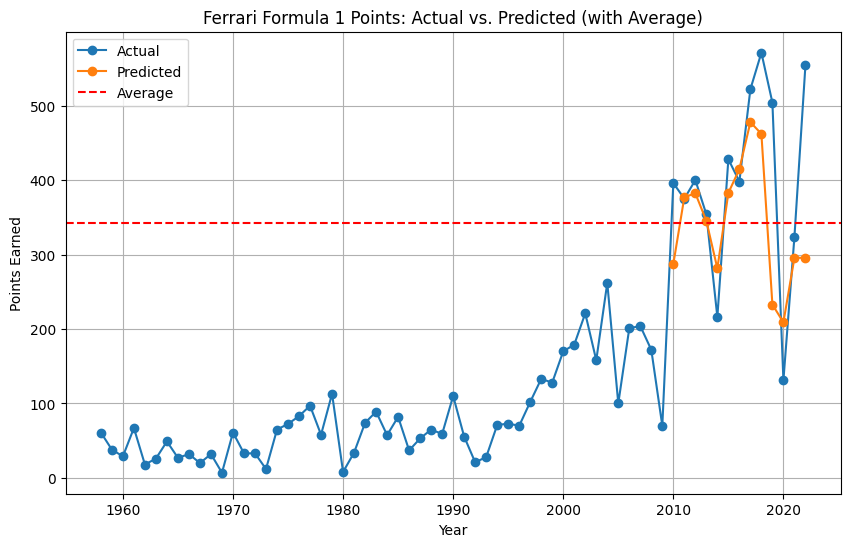

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
races = pd.read_csv('races.csv')


#use avergae, do rfr to do 10-22/see avg?

ferrari_constructor_id = constructors[constructors['name'] == 'Ferrari']['constructorId'].values[0]

merged_data = pd.merge(constructor_results, constructor_standings, on=['constructorId', 'raceId'])

merged_data = pd.merge(merged_data, races[['raceId', 'year']], on='raceId')

ferrari_data = merged_data[merged_data['constructorId'] == ferrari_constructor_id]

ferrari_points_by_year = ferrari_data.groupby('year')['points_x'].sum().reset_index()

X = ferrari_points_by_year['year'].values.reshape(-1, 1)
y = ferrari_points_by_year['points_x'].values

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

future_years = np.arange(2010, 2023).reshape(-1, 1)
future_predictions = model.predict(future_years)

average_predictions = np.mean(future_predictions)

plt.figure(figsize=(10, 6))
plt.plot(ferrari_points_by_year['year'], ferrari_points_by_year['points_x'], marker='o', label='Actual')
plt.plot(range(2010, 2023), future_predictions, marker='o', label='Predicted')
plt.axhline(y=average_predictions, color='r', linestyle='--', label='Average')
plt.xlabel('Year')
plt.ylabel('Points Earned')
plt.title('Ferrari Formula 1 Points: Actual vs. Predicted (with Average)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
drivers = pd.read_csv('drivers.csv')
drivers.head()



,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


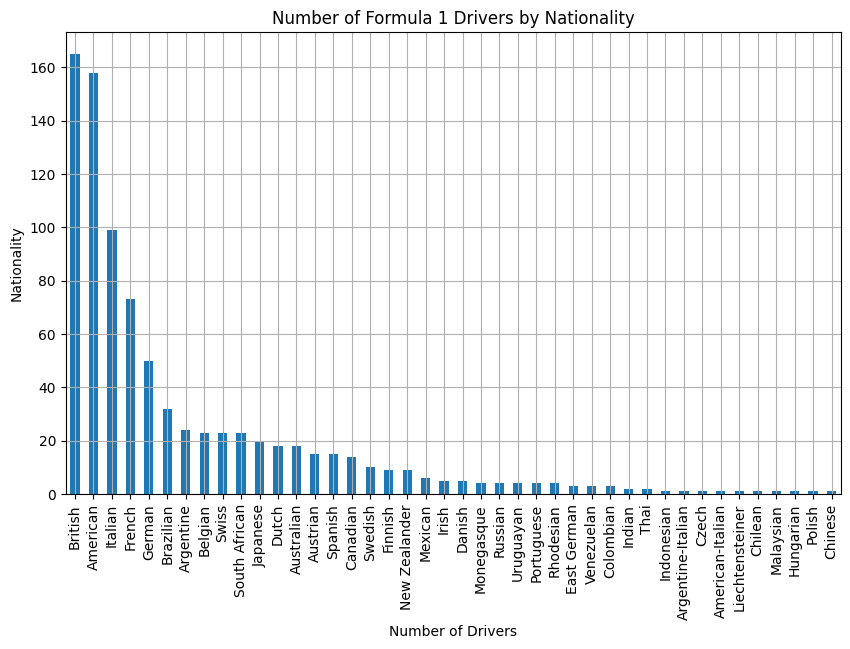

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt

# drivers = pd.read_csv('drivers.csv')
# nationality_counts = drivers['nationality'].value_counts()

# plt.figure(figsize=(10, 6))
# nationality_counts.plot(kind='bar')
# plt.ylabel('Nationality')
# plt.xlabel('Number of Drivers')
# plt.title('Number of Formula 1 Drivers by Nationality')
# plt.grid(True)
# plt.show()

C:\Users\mjpcp\AppData\Local\Temp\ipykernel_2312\3940488676.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', num_nationalities)


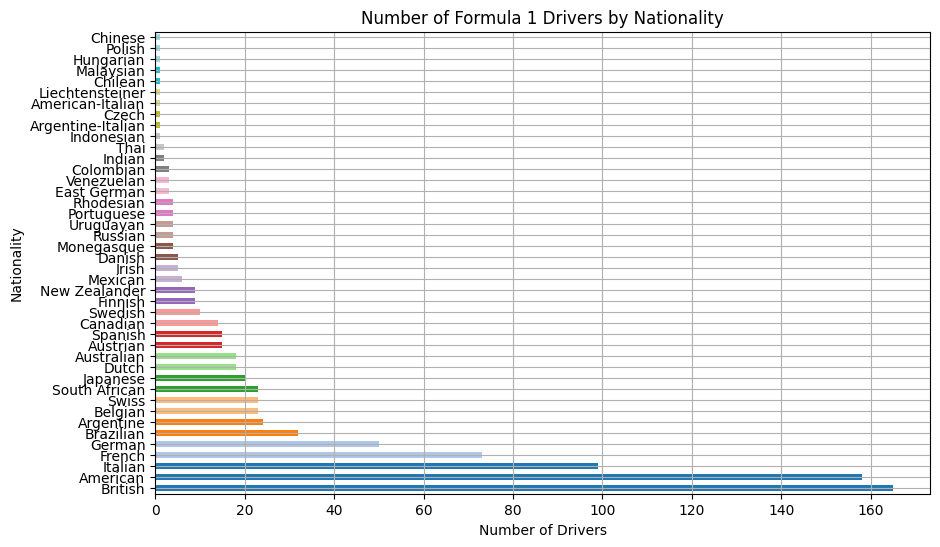

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

drivers = pd.read_csv('drivers.csv')
nationality_counts = drivers['nationality'].value_counts()
num_nationalities = len(nationality_counts)
color_palette = plt.cm.get_cmap('tab20', num_nationalities)


plt.figure(figsize=(10, 6))
nationality_counts.plot(kind='barh', color=color_palette(np.arange(num_nationalities)))
plt.xlabel('Number of Drivers')
plt.ylabel('Nationality')
plt.title('Number of Formula 1 Drivers by Nationality')
plt.grid(True)
plt.show()
